In [1]:
import controller as ctl
import model
import csv
import config as cf
from DISClib.ADT import list as lt
from DISClib.ADT import map as mp
from DISClib.DataStructures import mapentry as me
from DISClib.Algorithms.Sorting import mergesort as ms
from time import process_time as ptime
from datetime import datetime as dt
from datetime import date, timedelta as td
import pickle
assert cf
assert model


In [2]:
def loadData(catalog, file):

    filename = r"C:\Users\camil\OneDrive\Desktop\Los Andes\5to Semestre\EDA\Retos\Reto2-G08\Data/MoMa/Artists-utf8-"+file
    input_file = csv.DictReader(open(filename, encoding="utf-8"))
    for artist in input_file:
        model.addArtist(catalog, artist)


    filename= r"C:\Users\camil\OneDrive\Desktop\Los Andes\5to Semestre\EDA\Retos\Reto2-G08\Data/MoMA/Artworks-utf8-"+file
    input_file = csv.DictReader(open(filename, encoding="utf-8"))
    for artwork in input_file:
        model.addArtwork(catalog, artwork)

def loadReq(catalog):
    catalog["Req4"] = model.classifyByNation(catalog)
    


with open(r"C:\Users\camil\OneDrive\Desktop\Los Andes\5to Semestre\EDA\Retos\Reto2-G08\Data\catalogLarge", "rb") as file:
     catalog = pickle.load(file)
# catalog = ctl.initCatalog()
# loadData(catalog)
# ctl.sortArtists(catalog)
# ctl.sortArtworks(catalog)
# loadReq(catalog)

In [3]:
import pandas as pd


In [4]:
files = ["small.csv", "10pct.csv", "30pct.csv", "50pct.csv", "large.csv"]
funcs = ["model.getArtistsCronOrder", "model.getArtworksCronOrder" ,"model.classifyByNation", "model.transportArtwDepartment"]
index = []
tests = [[] for _ in range(5)]
columns = ["Func1", "Func2", "Func4", "Func5"]
j = 0
for file in files:
    catalog = ctl.initCatalog()
    loadData(catalog, file)
    ctl.sortArtists(catalog)
    ctl.sortArtworks(catalog)
    loadReq(catalog)
    index.append(file[:-4])
    i = 0
    for func in funcs:
        totalt = 0
        for _ in range(5):
            start = ptime()
            if i == 0:
                res = eval(func)(catalog, 1920, 1985)
            elif i == 1:
                res = eval(func)(catalog, "1944-06-06", "1989-11-09")
            elif i == 2:
                res = eval(func)(catalog)
            elif i == 3:
                res = eval(func)(catalog, "Drawings & Prints")
            stop = ptime()
            totalt += (stop-start)*1000
        totalt /= 5
        tests[j].append(totalt)

        i += 1
    j += 1




    




La función tardo 46.875 ms


La función tardo 0.0 ms


La función tardo 0.0 ms


La función tardo 15.625 ms


La función tardo 0.0 ms


La función tardo 0.0 ms


La función tardo 0.0 ms


La función tardo 15.625 ms


La función tardo 0.0 ms


La función tardo 0.0 ms


La función tardo 15.625 ms


La función tardo 31.25 ms


La función tardo 46.875 ms


La función tardo 46.875 ms


La función tardo 46.875 ms


La función tardo 46.875 ms


La función tardo 15.625 ms


La función tardo 0.0 ms


La función tardo 15.625 ms


La función tardo 0.0 ms


La función tardo 15.625 ms


La función tardo 968.75 ms


La función tardo 0.0 ms


La función tardo 0.0 ms


La función tardo 15.625 ms


La función tardo 0.0 ms


La función tardo 0.0 ms


La función tardo 187.5 ms


La función tardo 140.625 ms


La función tardo 109.375 ms


La función tardo 125.0 ms


La función tardo 140.625 ms


La función tardo 781.25 ms


La función tardo 921.875 ms


La función tardo 843.75 ms


La función tardo 937.

In [5]:
tests

[[3.125, 6.25, 43.75, 9.375],
 [3.125, 140.625, 868.75, 181.25],
 [6.25, 400.0, 2500.0, 593.75],
 [3.125, 728.125, 4184.375, 978.125],
 [9.375, 1584.375, 7756.25, 2296.875]]

In [7]:
tiempos = pd.DataFrame(index=index, columns=columns, data=tests)

In [8]:
tiempos["#artists"] = [1948, 6656, 10063, 12137, 15223]
tiempos["#artworks"] = [768, 15008, 43704, 71432, 138150]
tiempos["req1p"] = [862, 3231, 5031, 6117, 7664]
tiempos["req2p"] = [316, 6504, 19251, 32009, 61484]
tiempos["req5p"] = [394, 8133, 23709, 38888, 76117] 

In [9]:
tiempos

,Func1,Func2,Func4,Func5,#artists,#artworks,req1p,req2p,req5p
small,3.125,6.250,43.750,9.375,1948,768,862,316,394
10pct,3.125,140.625,868.750,181.250,6656,15008,3231,6504,8133
30pct,6.250,400.000,2500.000,593.750,10063,43704,5031,19251,23709
50pct,3.125,728.125,4184.375,978.125,12137,71432,6117,32009,38888
large,9.375,1584.375,7756.250,2296.875,15223,138150,7664,61484,76117


Text(0.5, 0, '# artistas en rango')

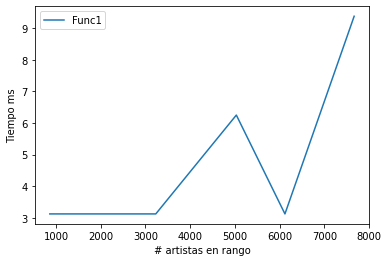

In [30]:
f1 = tiempos.plot.line("req1p", "Func1")
f1.set_ylabel("Tiempo ms")
f1.set_xlabel("# artistas en rango")

Text(0.5, 0, '# obras en rango')

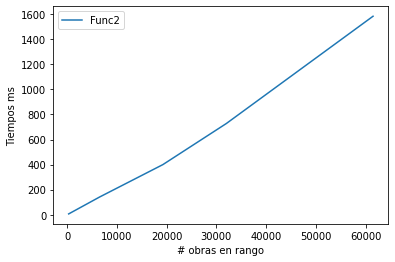

In [31]:
f2 = tiempos.plot.line("req2p", "Func2")
f2.set_ylabel("Tiempos ms")
f2.set_xlabel("# obras en rango")

Text(0, 0.5, 'Tiempo ms')

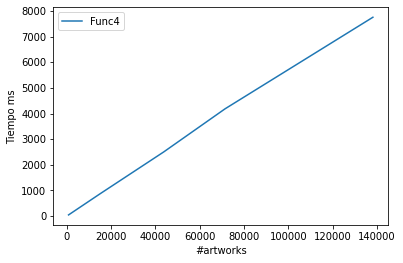

In [27]:
f4 = tiempos.plot.line("#artworks", "Func4")
f4.set_ylabel("Tiempo ms")

Text(0.5, 0, '# obras departamento')

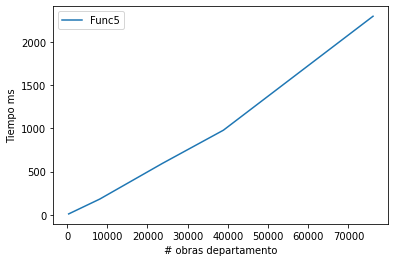

In [29]:
f5 = tiempos.plot.line("req5p", "Func5")
f5.set_ylabel("Tiempo ms")
f5.set_xlabel("# obras departamento")